In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

### Фазовые диаграммы (нафталин-дифениламин)

$M_{нафталин}=10×12,01+8×1,008≈128,17 г/моль$

$M_{дифениламин}=12×12,01+11×1,008+14,01≈169,23 г/моль$

In [54]:
# Constants

R = 8.314         # Дж/(моль*K)
T_eutectic = 31.2 # C
T_n = 80.2        # C
T_d = 52.5        # C

In [41]:
data = {'T crit. (C)':[80.2, 69, 56.5, 45, 36, 44, 52.5, 59],
        'm%, НФ':[100, 80, 65, 50, 40, 10, 0, np.nan],
        'mol%, НФ':[1.0, 0.8491, 0.7101, 0.5693, 0.4678, 0.1271, 0, np.nan]}
index = list(range(7))
index.append('control')
df = pd.DataFrame(data=data, index=index)

#### Таблица 1. Координаты кривой ликвидуса.

In [42]:
df

,T crit. (C),"m%, НФ","mol%, НФ"
0,80.2,100.0,1.0000
1,69.0,80.0,0.8491
2,56.5,65.0,0.7101
3,45.0,50.0,0.5693
4,36.0,40.0,0.4678
5,44.0,10.0,0.1271
6,52.5,0.0,0.0000
control,59.0,NaN,NaN


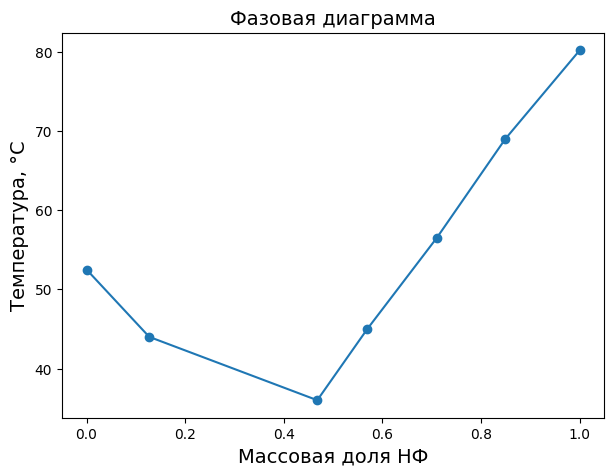

In [43]:
plt.figure(figsize=(7,5))
plt.plot(
    df["mol%, НФ"],
    df["T crit. (C)"],
    marker='o'
)

plt.title("Фазовая диаграмма", fontsize=14)
plt.ylabel("Температура, °C", fontsize=14)
plt.xlabel("Массовая доля НФ", fontsize=14)
plt.show()

#### Экспериментальная точка эвтектики $T = 36\degree C$
#### Теоретическое значение $T = 31.2\degree C$

In [46]:
# Правая ветвь
x_eutectic_exp = df.loc[np.argmin(df["T crit. (C)"]), "mol%, НФ"]
T_right = df.loc[(df["mol%, НФ"] >= x_eutectic_exp), "T crit. (C)"]
x_right = df[df['mol%, НФ'] >= x_eutectic_exp]['mol%, НФ']

phase_function = interp1d(T_right, x_right)
x_control = phase_function(df.loc['control', 'T crit. (C)'])
df.loc['control', 'mol%, НФ'] = x_control
df.loc['control', 'm%, НФ'] = (x_control * 128.2) / (x_control * 128.2 + (1 - x_control)*169.23) * 100
df

,T crit. (C),"m%, НФ","mol%, НФ"
0,80.2,100.000000,1.0000
1,69.0,80.000000,0.8491
2,56.5,65.000000,0.7101
3,45.0,50.000000,0.5693
4,36.0,40.000000,0.4678
5,44.0,10.000000,0.1271
6,52.5,0.000000,0.0000
control,59.0,68.079224,0.7379


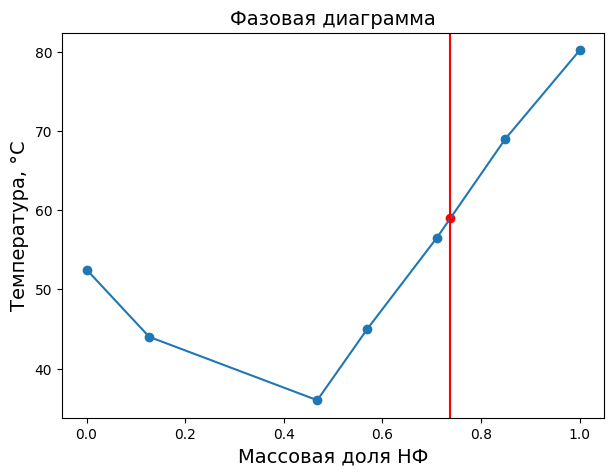

In [53]:
plt.figure(figsize=(7,5))
plt.plot(
    df["mol%, НФ"][-2::-1],
    df["T crit. (C)"][-2::-1],
    marker='o'
)
plt.scatter(x=df.loc['control', 'mol%, НФ'], y=df.loc['control', 'T crit. (C)'],
            marker='o', color='red')
plt.axvline(x=df.loc['control', 'mol%, НФ'], color='red')
plt.title("Фазовая диаграмма", fontsize=14)
plt.ylabel("Температура, °C", fontsize=14)
plt.xlabel("Массовая доля НФ", fontsize=14)
plt.show()

# Уравнение Шрёдера

## Основная форма

$$\ln x_i = -\frac{\Delta H_{\text{пл}}^i}{R} \left(\frac{1}{T} - \frac{1}{T_{\text{пл}}^i}\right)$$

где:
- $x_i$ — мольная доля компонента $i$ в растворе
- $\Delta H_{\text{пл}}^i$ — энтальпия плавления компонента $i$, Дж/моль
- $R$ — универсальная газовая постоянная, 8.314 Дж/(моль·К)
- $T$ — температура кристаллизации раствора, К
- $T_{\text{пл}}^i$ — температура плавления чистого компонента $i$, К

## Для расчета энтальпии плавления

Из уравнения Шрёдера можно выразить энтальпию плавления:

$$\Delta H_{\text{пл}}^i = -\frac{R \ln x_i}{\frac{1}{T} - \frac{1}{T_{\text{пл}}^i}}$$

### Допущения модели идеального раствора

1. Компоненты смешиваются без изменения энтальпии смешения
2. Отсутствует образование твердых растворов
3. Энтальпия плавления не зависит от температуры
4. Активности компонентов равны их мольным долям

In [57]:
delta_H_n = -R * np.log(x_eutectic_exp) / (1/(T_eutectic + 273.15) - 1/(T_n + 273.15))
delta_H_d = -R * np.log(1 - x_eutectic_exp) / (1/(T_eutectic + 273.15) - 1/(T_d + 273.15))

print(delta_H_n, delta_H_d)

13862.53687460448 24400.704758293574


$\Delta H_{пл.}^{нафталин}= 13862.5$ Дж/моль

$\Delta H_{пл.}^{дифениламин}= 24400.7$ Дж/моль